# **ANÁLISE EXPLORATÓRIA DE DADOS ESPACIAIS COM PYSAL**

**Autora:** *Gisliany Alves ([gisliany.alves@gmail.com]())*

Um dos grandes desafios modernos diz respeito ao entendimento da distribuição espacial de dados, advindos de fenômenos dos mais diversos âmbitos, como saúde, serviços, indústria, ambiente, etc. Para capturar e compreender essa natureza dos dados espaciais, entra em cena a chamada **Análise Exploratória de Dados Espaciais (AEDE)**. Através desse tipo de análise, é possível:

* Visualizar dados no espaço
* Identificar locais atípicos (*outliers*)
* Descobrir agrupamentos (*clusters*)
* Obter insights para possíveis modelagens incluindo a variável espacial

Um conceito imprescindível dentro da AEDE é o de autocorrelação espacial, cujos aspectos inerentes serão melhor discutidos a seguir. Além disso, para explorarmos tal conceito e realizarmos as análises espaciais, utilizaremos a bibioteca [PySal](https://pysal.org/), que é construída em Python, open source, continuamente atualizada e muito promissora.

## **PySal**

![PySal](https://pysal.org/pysal1.png)

Conforme mencionado anteriormente, PySal é uma biblioteca Python open source e cross-platform para análise de dados geoespaciais. Ela provê suporte para aplicações de alto nível, como:

* Detecção de clusters espaciais, hot-spots e outliers
* Construção de grafos a partir de dados espaciais
* Regressão espacial e modelagem estatística em redes geograficamente integradas
* Econometria espacial
* Análise Exploratória de Dados Espaço-Temporais

Ela contém uma família de pacotes divididos em quatro componentes principais:

1. Lib
2. Explore
3. Model
4. Viz

Os pacotes existentes em cada componente são detalhados no [Github](https://github.com/pysal/pysal).

### Instalation

PySal está disponível através do Anaconda Python no canal conda-forge:

In [ ]:
!conda config --add channels conda-forge
!conda install pysal

E pode ser instalado também através do pip:

In [ ]:
!pip install pysal

## Estudo de caso

### Relatórios de Mobilidade da Comunidade - Covid-19 (Google)

O [dataset dos relatórios de mobilidade da comunidade](https://www.google.com/covid19/mobility/), provido pela Google durante a pandemia de Covid-19 para 132 países, fornece as variações percentuais de mobilidade da população para certas categorias de lugares (compras e recreação, mercados e farmácias, parques, estações de trânsito, locais de trabalho e residenciais). Essas variações percentuais são relativas ao período base de 3 de janeiro à 6 de fevereiro de 2020, considerado pré-pandêmico e quando não havia restrições à circulação das pessoas.

Por exemplo, se uma localidade apresenta um valor de 20% de variação de movimentação em residência em 23 de março de 2020, uma quarta-feira, isso significa uma movimentação 20% maior com relação à mediana dos registros capturados em área residencial, nas quartas-feiras, para o período de linha de base.

A seguir, vamos ler o dataset e conferir as informações que ele apresenta.

In [37]:
import pandas as pd

data = pd.read_csv('mobility_report.csv', low_memory=False)
data.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4341154 entries, 0 to 4341153
Data columns (total 15 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          object 
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   place_id                                            object 
 8   date                                                object 
 9   retail_and_recreation_percent_change_from_baseline  float64
 10  grocery_and_pharmacy_percent_change_from_baseline   float64
 11  parks_percent_change_from_baseline   

Vamos renomear algumas colunas para que se tornem mais compreensíveis e converter a coluna `date` para o tipo correto.

In [39]:
# renomeando as colunas
data.columns = data.columns.str.replace('_percent_change_from_baseline', '')
data.columns = data.columns.str.replace('country_region', 'country')
data.columns = data.columns.str.replace('sub_region_1', 'state')
data.columns = data.columns.str.replace('sub_region_2', 'city')

# convertendo tipos
data['date'] = pd.to_datetime(data.date)

Para as análises que seguem, vamos reduzir o tamanho do dataset e trabalhar apenas com os dados dos estados brasileiros. Para isso, precisamos pegar as linhas em que `country` seja 'Brazil', `state` não seja nulo e as demais colunas `city` e `metro_area` sejam nulas.

In [40]:
# categorias de lugares
categories = [
    'retail_and_recreation', 'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces', 'residential'
]

# filtrando dados dos estados brasileiros
brasil = data[(
    (data.country == 'Brazil') & (data.state.isna() == False) & (data.city.isna()) & (data.metro_area.isna())
)][['state', 'date'] + categories]

brasil.tail()

,state,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
1063716,State of Tocantins,2021-02-15,-15.0,12.0,29.0,-31.0,-18.0,5.0
1063717,State of Tocantins,2021-02-16,-24.0,-2.0,5.0,-28.0,-26.0,6.0
1063718,State of Tocantins,2021-02-17,-18.0,7.0,-16.0,-21.0,-5.0,4.0
1063719,State of Tocantins,2021-02-18,-15.0,9.0,-24.0,-23.0,1.0,4.0
1063720,State of Tocantins,2021-02-19,-13.0,15.0,-19.0,-24.0,6.0,3.0


Faremos agora alguns ajustes para que os nomes dos estados brasileiros fiquem padronizados. Isso é necessário para uma operação que faremos na próxima seção.

In [41]:
# renomeando nomes dos estados
brasil.state = brasil.state.str.replace('State of ', '')
brasil.state = brasil.state.str.replace('Federal District', 'Distrito Federal')

Apenas para fins de economia de tempo de processamento, utilizaremos apenas os dados no mês de janeiro de 2021. A seguir, vamos verificar se há dados nulos para esse período e que precisem ser tratados.

In [42]:
# verificando se há dados nulos em janeiro
brasil[brasil.date.between('2021-01-01', '2021-01-31')].isna().sum()

state                    0
date                     0
retail_and_recreation    0
grocery_and_pharmacy     0
parks                    0
transit_stations         0
workplaces               0
residential              0
dtype: int64

Como não há dados nulos, vamos agora extrair a variação de mobilidade média de cada estado brasileiro:

In [43]:
# Filtrando para o mês de janeiro e tirando a média por estado
br_jan = brasil[brasil.date.between('2021-01-01', '2021-01-31')].groupby('state').mean()

In [44]:
br_jan.head()

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
state,,,,,,
Acre,-21.225806,15.000000,-9.838710,100.677419,-2.580645,9.774194
Alagoas,-23.000000,7.870968,-11.387097,-2.516129,-7.161290,5.322581
Amapá,-19.516129,21.870968,-4.516129,-5.193548,-4.322581,7.322581
Amazonas,-46.580645,6.000000,-39.161290,-25.645161,-21.032258,16.612903
Bahia,-29.709677,9.258065,-18.548387,-21.548387,-8.225806,7.193548


### Shapefile do Brasil

O [shapefile dos estados brasileiros](https://data.humdata.org/dataset/brazil-administrative-level-0-boundaries) fornece os dados geoespaciais que necessitaremos para visualizações dos dados em mapas e para computar os cálculos estatísticos subsequentes. Vamos utilizar a biblioteca `geopandas`, que é open source e facilita o trabalho com dados geoespaciais.

In [45]:
import geopandas as gpd

brasil_shp = gpd.read_file('geo_brazil/states.shp')
brasil_shp.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,33,BRA,Brazil,1,Acre,BR.AC,0,None,Estado,State,None,None,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350..."
1,33,BRA,Brazil,2,Alagoas,BR.AL,0,None,Estado,State,None,None,"MULTIPOLYGON (((-35.90153 -9.86180, -35.90153 ..."
2,33,BRA,Brazil,3,Amapá,BR.AP,0,None,Estado,State,None,None,"MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0..."
3,33,BRA,Brazil,4,Amazonas,BR.AM,0,None,Estado,State,None,Amazone,"POLYGON ((-67.32623 2.02968, -67.30118 1.92997..."
4,33,BRA,Brazil,5,Bahia,BR.BA,0,None,Estado,State,None,Ba¡a,"MULTIPOLYGON (((-38.69708 -17.97903, -38.69708..."


Agora, capturemos apenas as colunas de interesse `NAME_1`, `HASC_1` e `geometry` para gerar um novo dataset, renomeando as duas primeiras para `state` e `code` respectivamente. Façamos também um tratamento da coluna `code` para retirar a substring 'BR.'.

In [46]:
# selecionando colunas e renomeando-as
brasil_shp = brasil_shp[['NAME_1', 'HASC_1', 'geometry']].rename(
    columns={'NAME_1': 'state', 'HASC_1':'code'}
)

# ajustando coluna da sigla
brasil_shp.code = brasil_shp.code.str[-2:]

<AxesSubplot:>

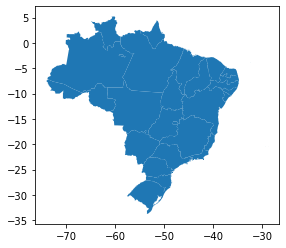

In [47]:
brasil_shp.plot()

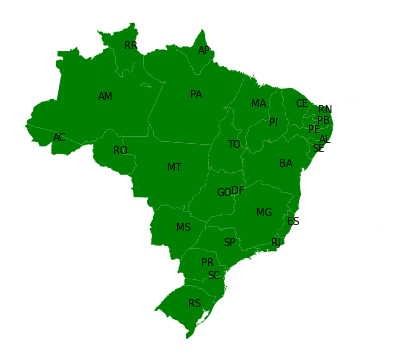

In [48]:
import matplotlib.pyplot as plt

ax = brasil_shp.plot(color='green', figsize=(7, 7))
ax.set_axis_off()

# inserindo as siglas
brasil_shp.apply(
    lambda row: ax.annotate(text = row.code, xy = row.geometry.centroid.coords[0]), axis = 1
);

In [49]:
brasil_shp.head()

,state,code,geometry
0,Acre,AC,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350..."
1,Alagoas,AL,"MULTIPOLYGON (((-35.90153 -9.86180, -35.90153 ..."
2,Amapá,AP,"MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0..."
3,Amazonas,AM,"POLYGON ((-67.32623 2.02968, -67.30118 1.92997..."
4,Bahia,BA,"MULTIPOLYGON (((-38.69708 -17.97903, -38.69708..."


In [50]:
# unindo datasets
df = brasil_shp.join(br_jan, on='state', how='inner')
df.head()

,state,code,geometry,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,Acre,AC,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350...",-21.225806,15.000000,-9.838710,100.677419,-2.580645,9.774194
1,Alagoas,AL,"MULTIPOLYGON (((-35.90153 -9.86180, -35.90153 ...",-23.000000,7.870968,-11.387097,-2.516129,-7.161290,5.322581
2,Amapá,AP,"MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0...",-19.516129,21.870968,-4.516129,-5.193548,-4.322581,7.322581
3,Amazonas,AM,"POLYGON ((-67.32623 2.02968, -67.30118 1.92997...",-46.580645,6.000000,-39.161290,-25.645161,-21.032258,16.612903
4,Bahia,BA,"MULTIPOLYGON (((-38.69708 -17.97903, -38.69708...",-29.709677,9.258065,-18.548387,-21.548387,-8.225806,7.193548


### Análise Espacial

#### Mapas Coropléticos

Uma maneira de representar dados espaciais se dá por meio de mapas coropléticos (do inglês, *choropleth maps*), em que as áreas espaciais são coloridas de acordo com uma medida a elas associada. Utilizando o `geopandas`, podemos visualizar os mapas coropléticos das variações percentuais médias de mobilidade em relação ao baseline. Quanto mais escuro o tom de laranja, mais intensa a mobilidade para uma determinada categoria de lugar.

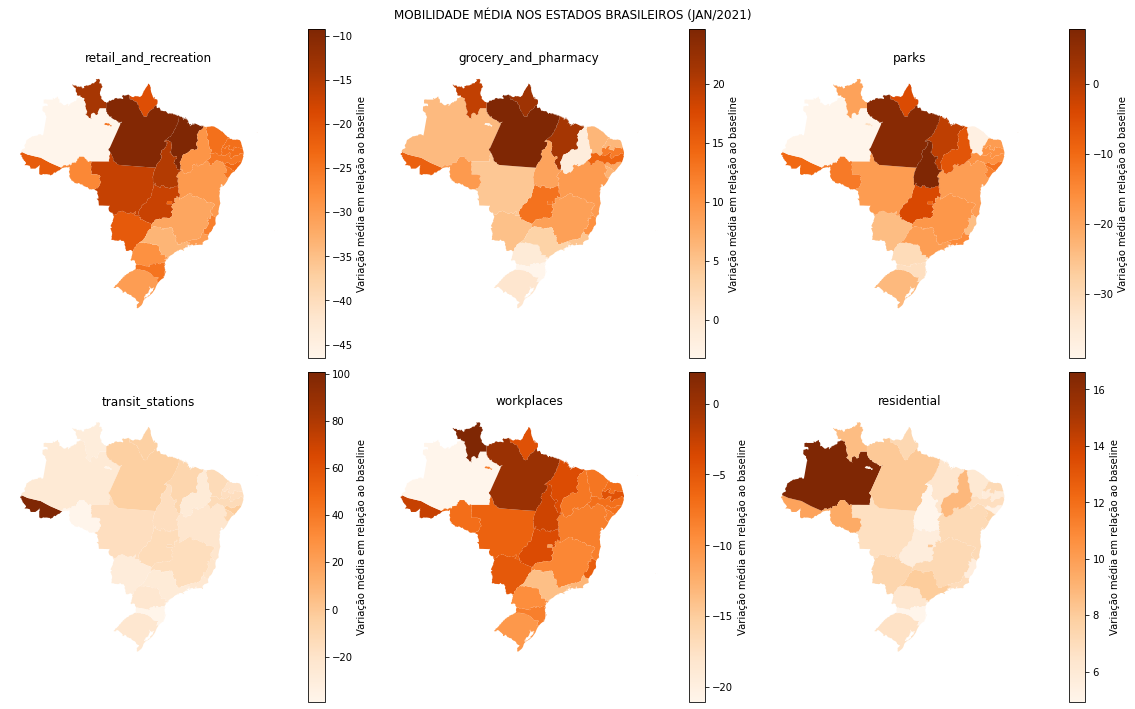

In [51]:
fig, ax = plt.subplots(2, 3, figsize=(16, 10))

for i, cat in enumerate(categories):
    df.plot(
        ax=ax[i//3][i%3],
        column=cat,
        cmap='Oranges',
        legend=True,
        legend_kwds={'label': 'Variação média em relação ao baseline'}
    )
    
    ax[i//3][i%3].set_axis_off()
    ax[i//3][i%3].set_title(cat)
    
fig.suptitle('MOBILIDADE MÉDIA NOS ESTADOS BRASILEIROS (JAN/2021)')
plt.tight_layout()

#### Autocorrelação espacial

> *No mundo, todas as coisas se parecem, mas coisas mais próximas são mais parecidas que aquelas mais distantes.*
> (TOBLER, 1970)

A autocorrelação espacial é definida como uma avaliação da **correlação** entre os **valores de um mesmo atributo** em **diferentes localizações** no espaço. Se a autocorrelação for:

* (+) Positiva $\Rightarrow$ dados próximos no espaço também são similares em valor $\Rightarrow$ formação de clusters
* (-) Negativa $\Rightarrow$ dados próximos no espaço são distintos em valor $\Rightarrow$ heterogeneidade espacial
* (0) Nula $\Rightarrow$ ausência de relação entre proximidade dos dados e similaridade valor $\Rightarrow$ aleatoriedade espacial 

![autocorrelação](http://emilkirkegaard.dk/en/wp-content/uploads/SAC_illu.png)

#### Matriz de vizinhança

A matriz de vizinhança $W$ representa o arranjo ou a topologia espacial dos dados. Supondo um conjunto de $n$ áreas, a matriz $W$ é $n × n$ e positiva, de modo que cada elemento $w_{ij}$ é $1$ quando duas áreas são vizinhas e $0$, caso contrário. Os critérios para determinação de vizinhança mais comuns são a contiguidade do tipo Torre e do tipo Queen.

Uma prática comum é a normalização das linhas da matriz de proximidade espacial, de modo a soma de seus elementos seja igual à unidade.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRQNJcOvwcLxb4hhyP8kXb-xQlbPMMJEtKM0Q&usqp=CAU" style="height: 200px;"></img>

In [57]:
import libpysal as lps

w = lps.weights.Queen.from_dataframe(df)
w.transform = 'r' #row-standardized

In [56]:
df.head()

,state,code,geometry,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,Acre,AC,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350...",-21.225806,15.000000,-9.838710,100.677419,-2.580645,9.774194
1,Alagoas,AL,"MULTIPOLYGON (((-35.90153 -9.86180, -35.90153 ...",-23.000000,7.870968,-11.387097,-2.516129,-7.161290,5.322581
2,Amapá,AP,"MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0...",-19.516129,21.870968,-4.516129,-5.193548,-4.322581,7.322581
3,Amazonas,AM,"POLYGON ((-67.32623 2.02968, -67.30118 1.92997...",-46.580645,6.000000,-39.161290,-25.645161,-21.032258,16.612903
4,Bahia,BA,"MULTIPOLYGON (((-38.69708 -17.97903, -38.69708...",-29.709677,9.258065,-18.548387,-21.548387,-8.225806,7.193548


In [63]:
w[0]

{3: 0.5, 21: 0.5}

/home/gisliany/anaconda3/envs/geo_env/lib/python3.7/site-packages/libpysal/weights/weights.py:1294: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/home/gisliany/anaconda3/envs/geo_env/lib/python3.7/site-packages/libpysal/weights/weights.py:1294: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/home/gisliany/anaconda3/envs/geo_env/lib/python3.7/site-packages/libpysal/weights/weights.py:1294: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cen

/home/gisliany/anaconda3/envs/geo_env/lib/python3.7/site-packages/libpysal/weights/weights.py:1305: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.apply(lambda p: p.x),
/home/gisliany/anaconda3/envs/geo_env/lib/python3.7/site-packages/libpysal/weights/weights.py:1306: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.apply(lambda p: p.y),


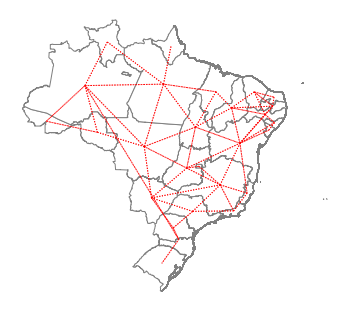

In [64]:
ax = df.plot(edgecolor='grey', facecolor='w', figsize=(6,6))
w.plot(df, ax=ax, 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker='')
)
ax.set_axis_off()

/home/gisliany/anaconda3/envs/geo_env/lib/python3.7/site-packages/splot/_viz_libpysal_mpl.py:115: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_shp = gdf.centroid.values
/home/gisliany/anaconda3/envs/geo_env/lib/python3.7/site-packages/splot/_viz_libpysal_mpl.py:154: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.plot(ax=ax, **node_kws)


(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

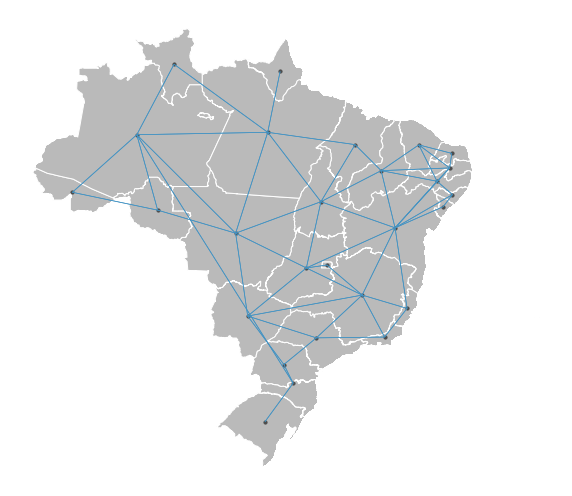

In [65]:
from splot.libpysal import plot_spatial_weights

plot_spatial_weights(w, df, )

#### Média Móvel Espacial

Também chamada de *spatial lag*, pode ser entendida como uma média ponderada de uma variável pelas localizações vizinhas. Ela produz uma superfície com menores flutuações, permitindo o estudo da variação da disposição espacial de um dado atributo. A média móvel espacial para a variável $y$ na i-ésima área pode ser calculada utilizando-se a matriz de vizinhança normalizada:

$$[Wy]_i = \sum_{j=1}^n w_{ij}y_j$$

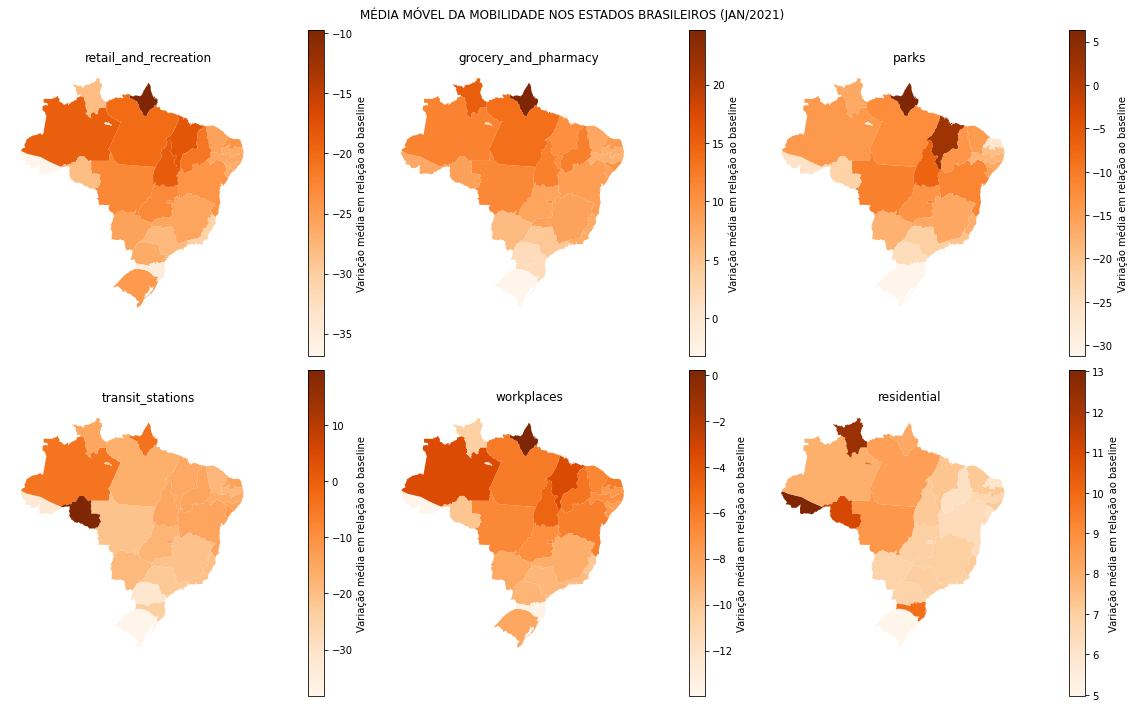

In [66]:
fig, ax = plt.subplots(2, 3, figsize=(16, 10))

for i, cat in enumerate(categories):
    ylag = lps.weights.lag_spatial(w, df[cat])
    df.plot(
        ax=ax[i//3][i%3],
        column=ylag,
        cmap='Oranges',
        legend=True,
        legend_kwds={'label': 'Variação média em relação ao baseline'}
    )
    
    ax[i//3][i%3].set_axis_off()
    ax[i//3][i%3].set_title(cat)
    
fig.suptitle('MÉDIA MÓVEL DA MOBILIDADE NOS ESTADOS BRASILEIROS (JAN/2021)')
plt.tight_layout()

#### Estatísticas para autocorrelação espacial

Uma das estatísticas mais utilizadas para mensurar a autocorrelação espacial é o chamado **Teste de Moran I**, com as variações de seus índices globais e locais. Uma estatística global significa que um só valor é mensurado para toda a região em análise, enquanto que, estatísticas locais atribuem um valor para cada ponto dentro da região em estudo.

#### Índice Global de Moran I
O Índice Global de Moran I para uma variável $y$ é dado pela seguinte expressão formal:

$$I = \frac{\sum_i\sum_j w_{ij}(y_i - \bar{y})(y_j - \bar{y})}{\sum_i (y_i - \mu)^2}$$

Onde $\bar{y}$ é a média de $y$ para todas as observações e $w_{ij}$ são os elementos da matriz de vizinhança normalizada.

O Índice de Moran I varia entre $-1$ e $1$, em que valores positivos indicam autocorrelação positiva, valores negativos indicam autocorrelação negativa e o valor nulo indica aleatoriedade espacial. Para validar o índice estatisticamente, associa-se um teste de pseudo-significância, cuja hipótese nula é a independência espacial, ou seja, seu valor se iguala a zero ($I = 0$).

In [69]:
import esda

moran = {}

for i, cat in enumerate(categories):
    moran[cat] = esda.moran.Moran(df[cat].values, w)
    print('I: %.4f (p-valor: %.4f)' % (moran[cat].I, moran[cat].p_sim))

I: 0.1279 (p-valor: 0.1040)
I: 0.4481 (p-valor: 0.0030)
I: 0.3716 (p-valor: 0.0020)
I: -0.1346 (p-valor: 0.0970)
I: -0.0542 (p-valor: 0.4720)
I: 0.2290 (p-valor: 0.0100)


/home/gisliany/anaconda3/envs/geo_env/lib/python3.7/site-packages/splot/_viz_esda_mpl.py:47: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  ax.spines['left'].set_smart_bounds(True)
/home/gisliany/anaconda3/envs/geo_env/lib/python3.7/site-packages/splot/_viz_esda_mpl.py:48: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  ax.spines['bottom'].set_smart_bounds(True)
/home/gisliany/anaconda3/envs/geo_env/lib/python3.7/site-packages/splot/_viz_esda_mpl.py:47: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  ax.spines['left'].set_smart_bounds(True)
/home/gisliany/anaconda3/envs/geo_env/lib/python3.7/site-packages/splot/_viz_esda_mpl.py:48: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated i

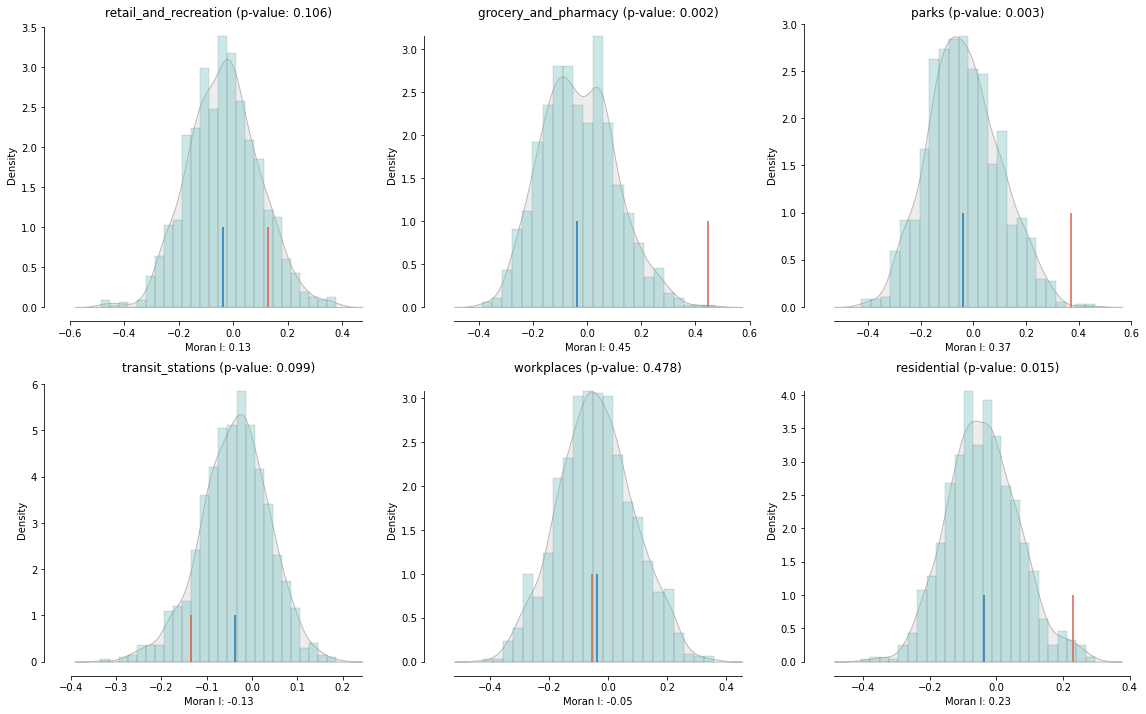

In [68]:
import seaborn as sns
from splot.esda import plot_moran_simulation

fig, ax = plt.subplots(2, 3, figsize=(16, 10))

for i, cat in enumerate(categories):
    sns.histplot(moran[cat].sim, ax=ax[i//3][i%3], stat='density', alpha=0.4, color='#7dc6c5', linewidth=0.1)
    plot_moran_simulation(moran[cat], ax=ax[i//3][i%3], aspect_equal=False)
    ax[i//3][i%3].set_title('%s (p-value: %.3f)' % (cat, moran[cat].p_sim))
    
plt.tight_layout()

Uma forma gráfica de interpretar o Índice de Moran I é como a inclinação da reta de regressão do chamado Diagrama de Espalhamento de Moran. A ideia geral do diagrama é comparar os valores de um atributo normalizado $z$ com a média dos seus vizinhos, por meio de um gráfico bidimensional em que $z$ se distribui no eixo x e $Wz$ (onde $W$ é a matriz de vizinhança normalizada), no eixo y.

![diagrama de moran](https://www.estudegratis.com.br/images/questoes/f2e744fade2745167388.jpg)

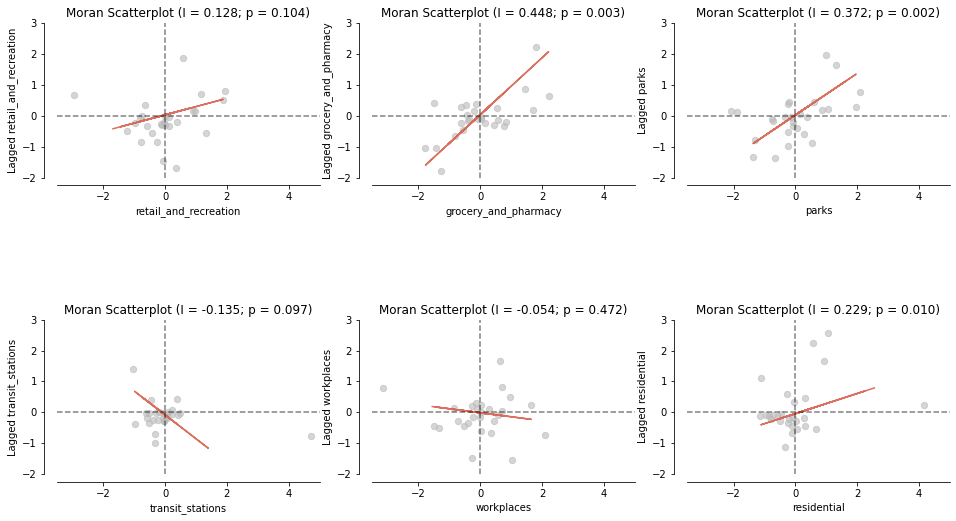

In [70]:
from splot.esda import moran_scatterplot

fig, ax = plt.subplots(2, 3, figsize=(16, 10))
for i, cat in enumerate(categories):
    moran_scatterplot(moran[cat], ax=ax[i//3][i%3])

    ax[i//3][i%3].set_ylim(-2, 3)
    ax[i//3][i%3].set_xlim(-3.5, 5)
    ax[i//3][i%3].set_ylabel('Lagged ' + cat)
    ax[i//3][i%3].set_xlabel(cat)
    ax[i//3][i%3].set_title('Moran Scatterplot (I = %.3f; p = %.3f)' % (moran[cat].I, moran[cat].p_sim))

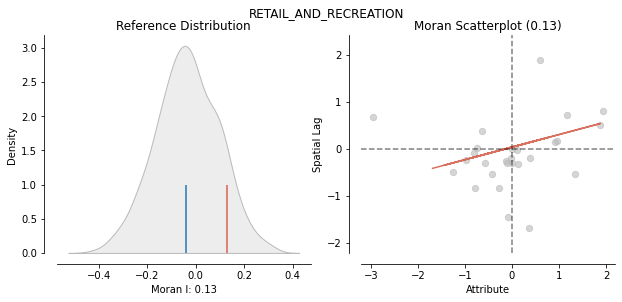

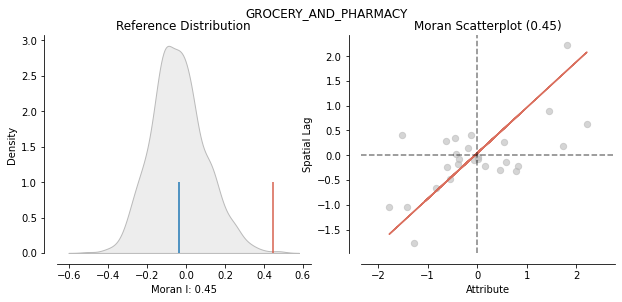

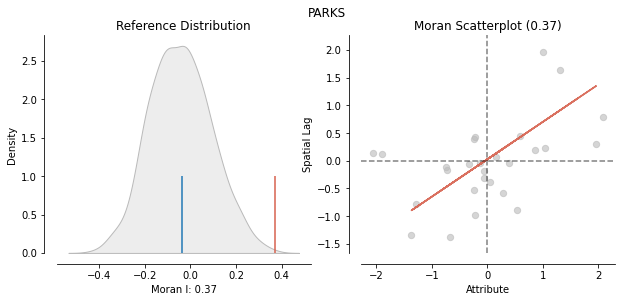

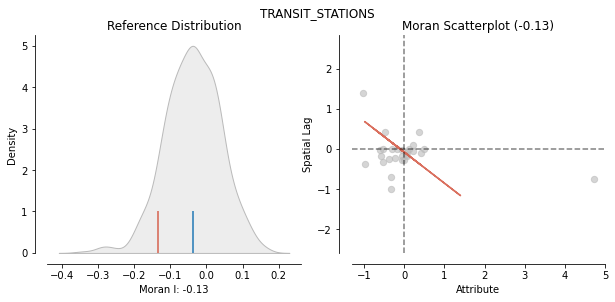

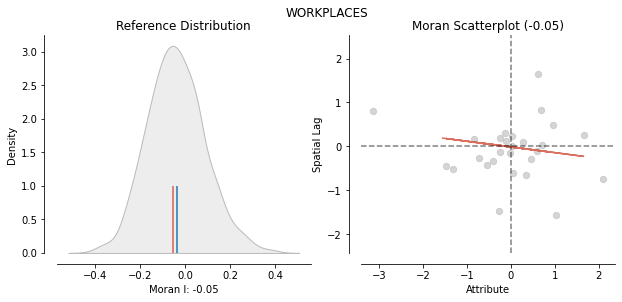

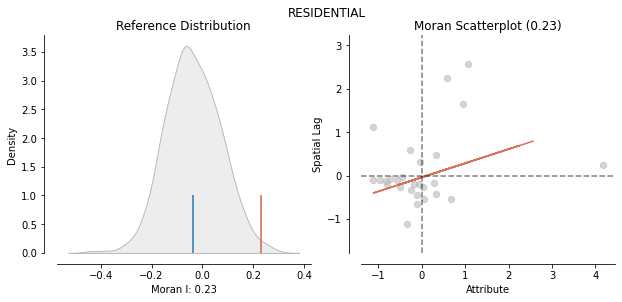

In [71]:
from splot.esda import plot_moran

for i, cat in enumerate(categories):
    fig, ax = plot_moran(moran[cat], zstandard=True)
    fig.suptitle(cat.upper())

#### Índice Local de Moran I

Além da estatística global, também há uma variação local do Índice de Moran. O Índice Local de Moran é parte da classe de Indicadores Locais de Associação Espacial (LISA), expresso para cada área $i$ a partir dos valores normalizados de um atributo $z_i$ como:

$$I_i = \frac{z_i\sum_{j=1}^n w_{ij}z_j}{\sum_{j=1}^n z_j^2}$$

Como o diagrama de espalhamento não apresenta uma métrica de significância para cada observação, nesse ponto é interessante que seja computado o Índice Local de Moran, a fim de se constatar a magnitude e a validade (significância) da correlação espacial de cada área.

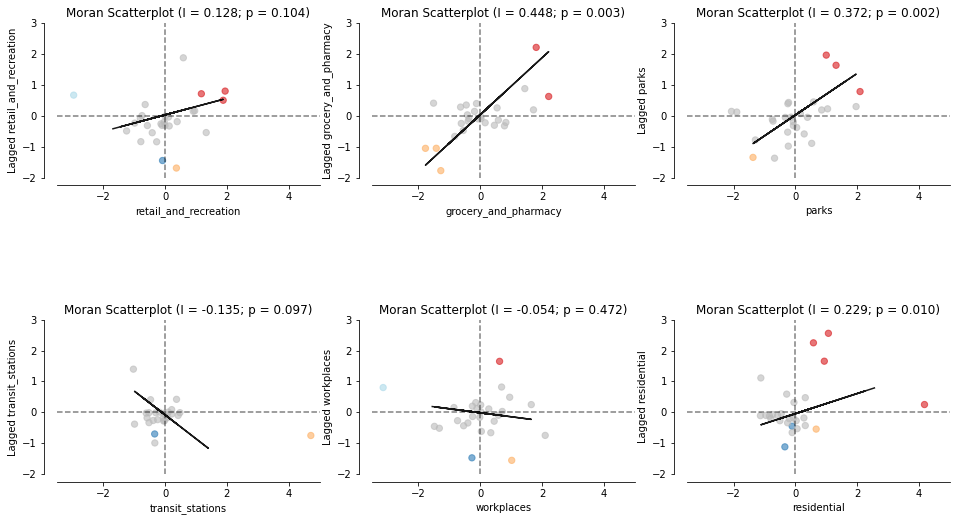

In [74]:
fig, ax = plt.subplots(2, 3, figsize=(16, 10))

moran_local = {}
for i, cat in enumerate(categories):
    moran_local[cat] = esda.moran.Moran_Local(df[cat], w)
    moran_scatterplot(moran_local[cat], ax=ax[i//3][i%3], p=0.05)

    ax[i//3][i%3].set_ylim(-2, 3)
    ax[i//3][i%3].set_xlim(-3.5, 5)
    ax[i//3][i%3].set_ylabel('Lagged ' + cat)
    ax[i//3][i%3].set_xlabel(cat)
    ax[i//3][i%3].set_title('Moran Scatterplot (I = %.3f; p = %.3f)' % (moran[cat].I, moran[cat].p_sim))

Outra visualização também possível é a criação de mapas temáticos, em que cada recorte espacial é colorido de acordo com o quadrante ao qual sua observação pertence no diagrama de espalhamento de Moran.

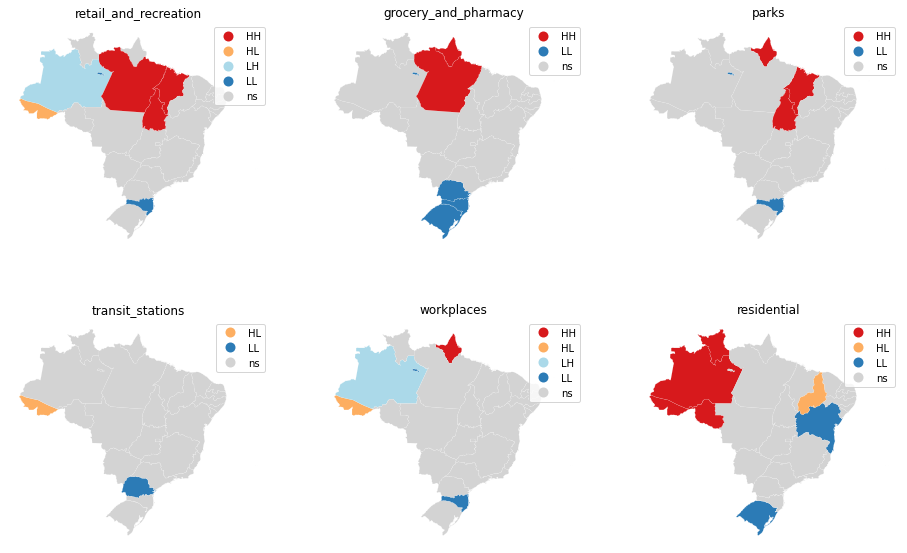

In [77]:
from splot.esda import lisa_cluster

fig, ax = plt.subplots(2, 3, figsize=(16, 10))

for i, cat in enumerate(categories):
    lisa_cluster(moran_local[cat], df, ax=ax[i//3][i%3], p=0.05)
    ax[i//3][i%3].set_title(cat)

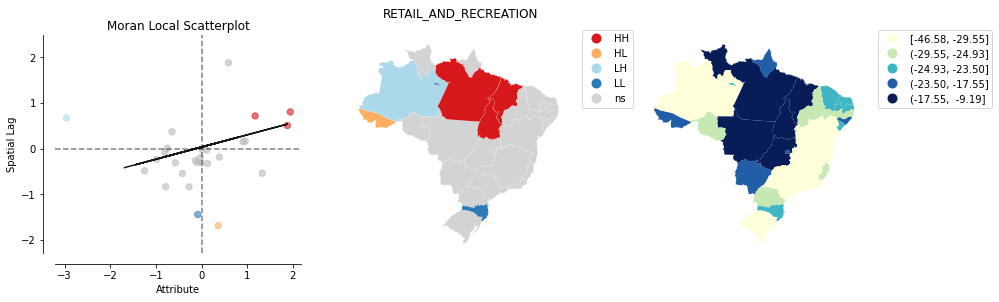

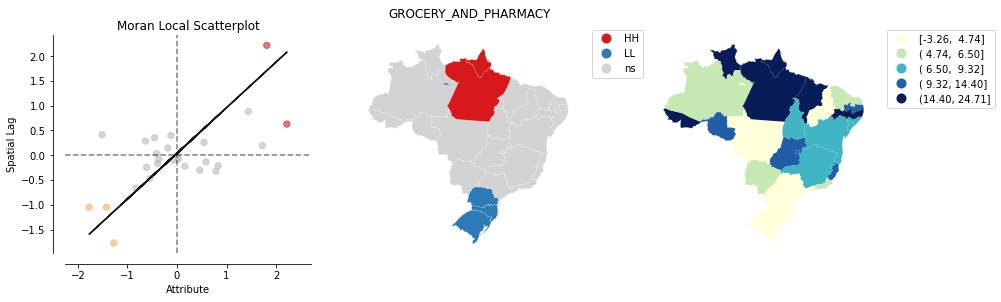

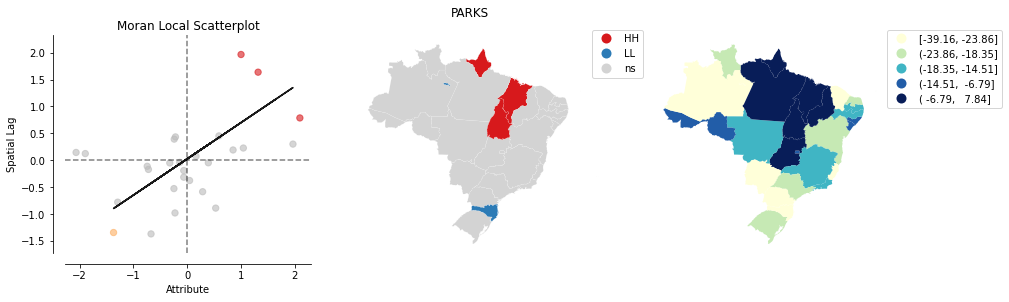

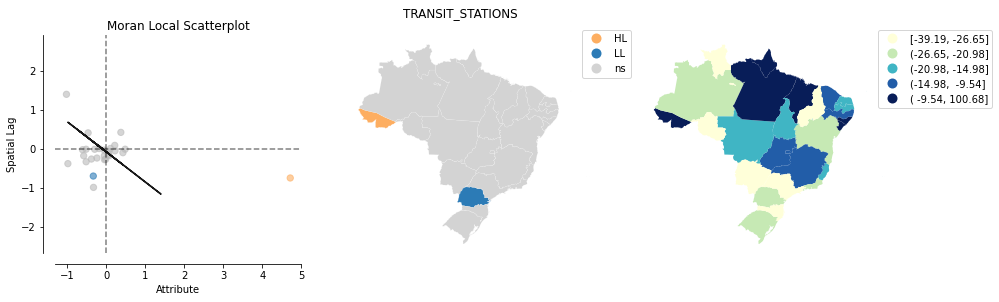

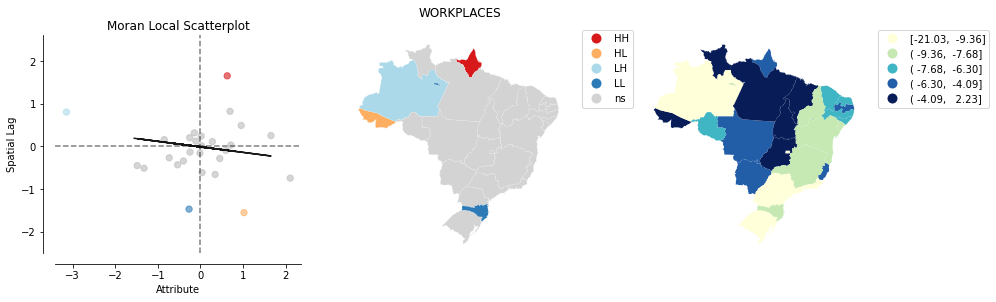

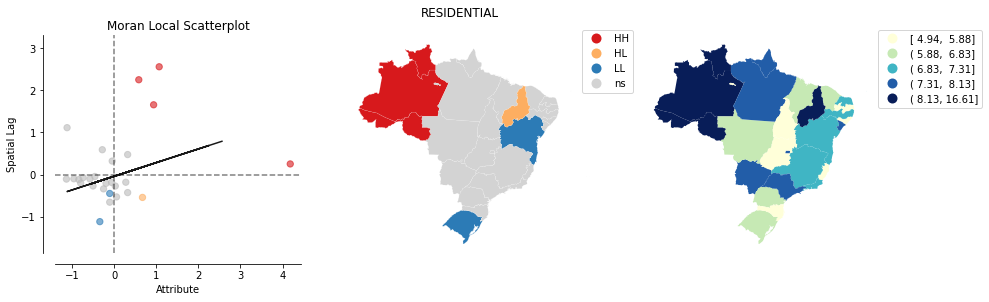

In [78]:
from splot.esda import plot_local_autocorrelation

for i, cat in enumerate(categories):
    fig, axs = plot_local_autocorrelation(moran_local[cat], df, cat)
    fig.suptitle(cat.upper())